In [130]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [131]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [133]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [134]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


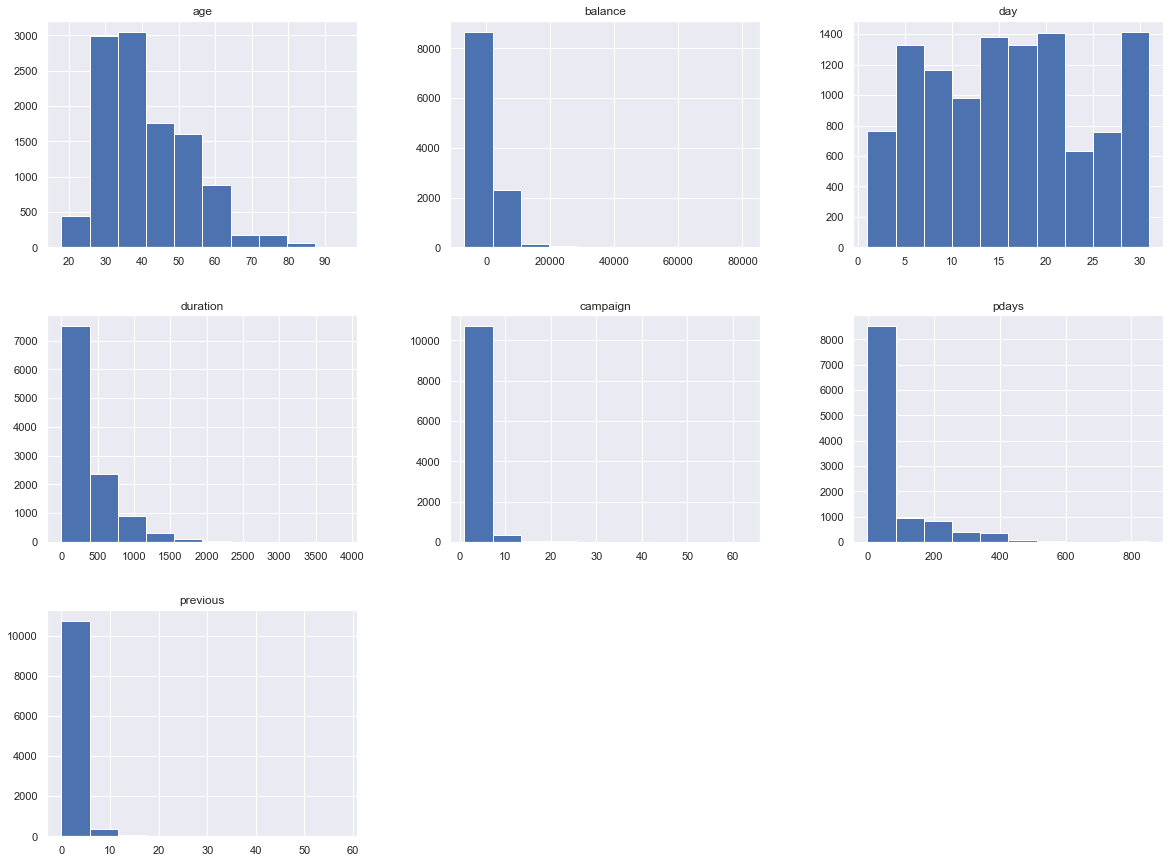

In [135]:
#distribution  of num features
df.hist(figsize=(20,15))
plt.show()

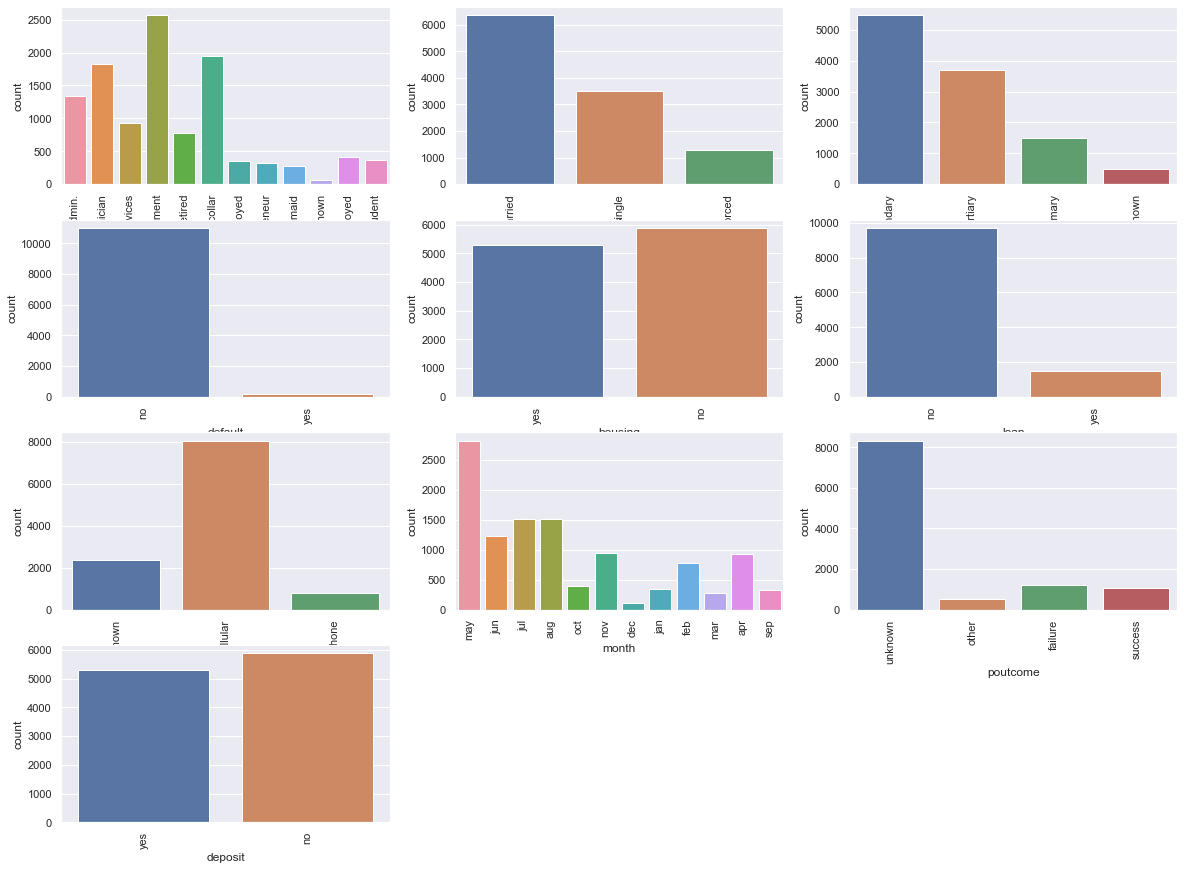

In [137]:
#distribution  of cat features
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','deposit']
i = 1
sns.set(rc={'figure.figsize':(20,15)})
for column in columns :
    plt.subplot(4,3,i)
    ax= sns.countplot(x = column , data=df )
    plt.xticks(rotation=90)
    i+=1
    plt.show




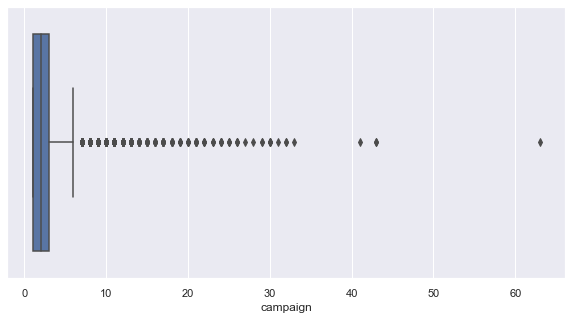

In [138]:
# boxplot some num var too see outliers
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x="campaign",data=df)
plt.show()

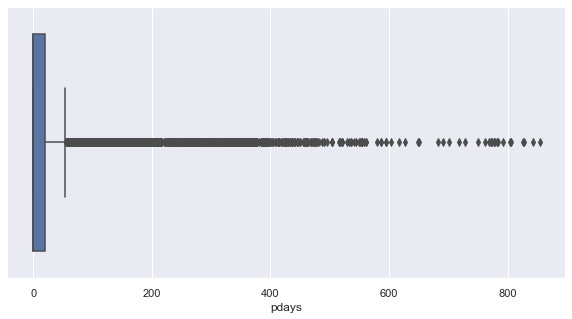

In [139]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x="pdays",data=df)
plt.show()

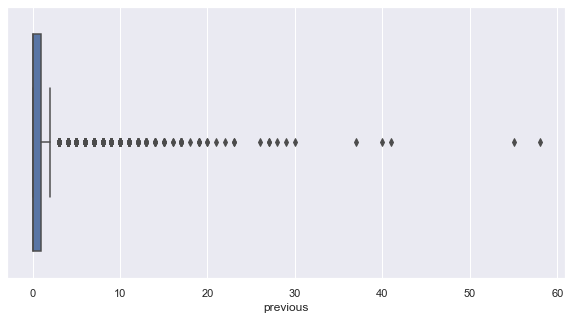

In [140]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x="previous",data=df)
plt.show()

In [141]:
# delete outliers
columns = ["pdays" , "previous" , "campaign"]
for column in columns : 
    df[column] = np.where(df[column] > 3*df[column].std(), df[column].median(),df[column])

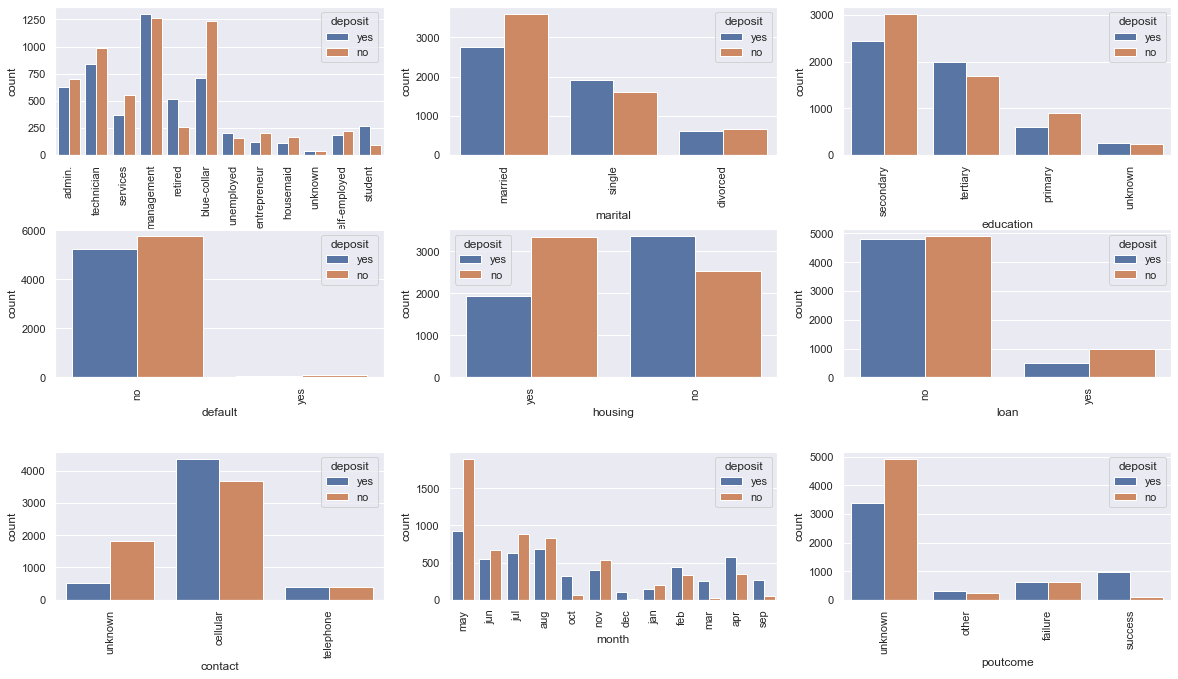

In [142]:
# distribution par rapport au target

columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
sns.set(rc={'figure.figsize':(20,15)})
i=1
for column in columns : 
    plt.subplot(4,3,i)
    plt.subplots_adjust(hspace=0.5)
    ax= sns.countplot(x = column ,hue='deposit' , data=df )
    plt.xticks(rotation=90)
    i+=1
    plt.show

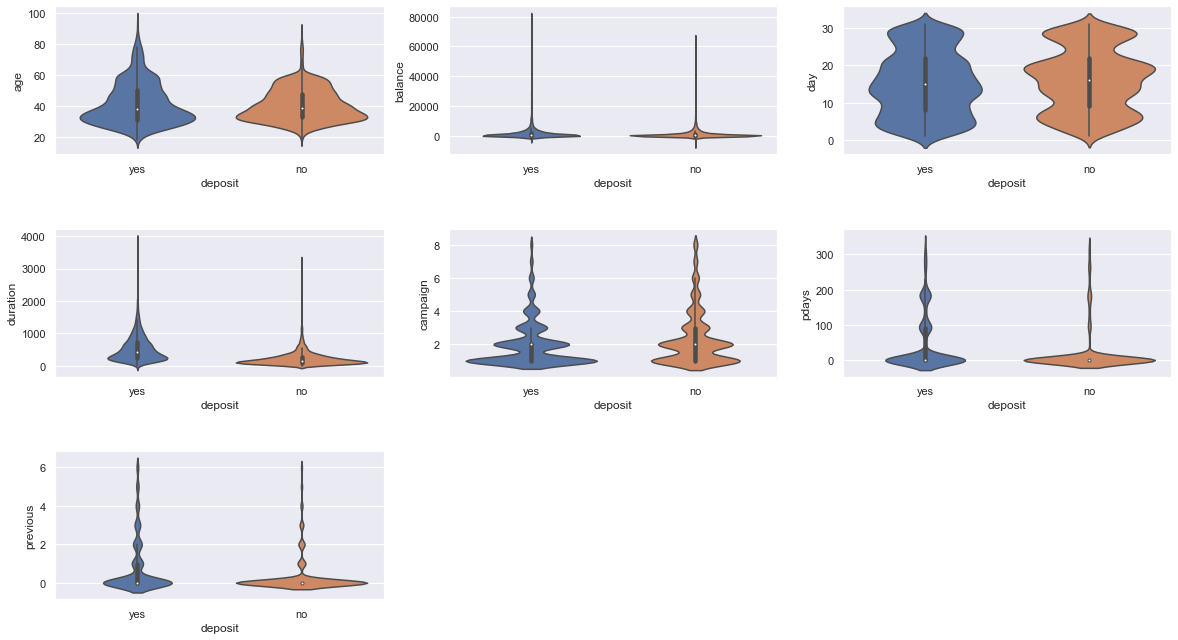

In [143]:
columns2 = list(df.columns)[0:-1]
i= 1 
for column in columns2 :
    if column not in columns : 
        plt.subplot(4,3,i)
        plt.subplots_adjust(hspace=0.5)
        sns.violinplot(x = "deposit" , y = column , data=df)
        plt.show
        i+=1
    


In [144]:
# Encode data cat to num 
df_ = df
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

for column in columns : 
    df_[column] = labelEncoder.fit_transform(df[column])
df_['deposit'] = labelEncoder.fit_transform(df['deposit'])
df_.drop('pdays', axis = 1,inplace=True)


## Deep learning network

In [146]:
# define the features and the target 
X= df_[list(df_.columns)]
Y = df_['deposit']

In [168]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1234)
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.05)

In [169]:
from sklearn.preprocessing import StandardScaler

#Standardize The Data
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [170]:
#define the sequential model

model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1]))
model.add(Dense(30))
model.add(Dropout(0.3))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 30)                510       
_________________________________________________________________
dense_133 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_20 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 16        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=len(X_train),
                    epochs=100,
                    verbose=1,
                    validation_data=(X_valid, y_valid)
                    )

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 0.5388
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.9963 - val_loss: 0.0000e+00 - val_accuracy: 0.5189
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 0.9956 - val_loss: 0.0000e+00 - val_accuracy: 0.5070
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.9961 - val_loss: 0.0000e+00 - val_accuracy: 0.5070
Epoch 5/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 0.9948 - val_loss: 0.0000e+00 - val_accuracy: 0.5070
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.9948 - val_loss: 0.0000e+00 - val_accuracy: 0.5070
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.9936 - val_loss: 

In [184]:
score = model.evaluate( X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8827216029167175
